In [14]:
import numpy as np
import menzalib as mz
from scipy.optimize import curve_fit
import pylab as py
#from scipy.signal import find_peaks 

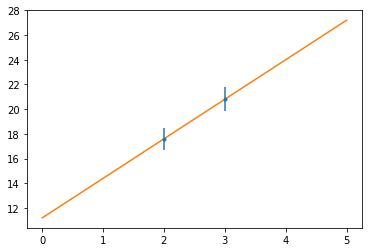

12.799999999999983 6.7801032939056824 [ 3.2 11.2] [1.29916892 3.23719616] [17.6 20.8]


In [46]:
#dati = numpy.array([])

def lineare (x,m,q):
    return m*x + q
   
#V = np.array([ 27.2, 45.2, 65.2])  #scazzato, viene 15.0 quando il teorico è 16.6
#V = np.array([23.25, 40.25, 57.0]) #con questo adirittura la spaziatura diminuisce all'aumentare di E_A...
#V=np.array([19.2, 36.8, 57.2, 78.4])
#V = np.array ([19.2, 36.8, 56.8, 78.4])
#V = np.array([24.0, 40.5, 57.])  #migliore pur essendo i dati presi peggio... U_E = 9.8, viene 16.5 contro 16.6 atteso
V = np.array ([24.8, 42.4, 63.2])     #U_E = 7.1,    viene 12.8
#V = np.array ([28.8, 46.4, 65.6])    #U_E = 10.7    viene   15.2
#V = np.array ([24., 40.8, 61.6])     #U_E = 6.5     viene     10.8
delta_E = np.array([0.]*(len(V) -1) )

for i in range (0, len(V)-1):
    delta_E[i] = V[i+1] - V[i]
    
d_delta_E = mz.dVosc (delta_E/10)*10
n = np.array([2,3])
#n = np.array([2,3,4])
popt, pcov = curve_fit (lineare, n, delta_E, sigma = d_delta_E, absolute_sigma = 'True' )
#stima di E_a, propagazione degli errori (covarianza ecc...)    
py.errorbar(n, delta_E , d_delta_E, fmt = '.')
x = np.linspace (0., 5., 1000)
py.plot ( x, lineare (x, *popt) )
py.savefig('immagini/71.eps',format='eps')
py.show()

cov=np.zeros([3,3])
for i in range(1,3):
    for j in range(1,3): cov[i][j]=pcov[i-1][j-1]
print ( lineare(0.5, *popt), mz.dy(lineare,[0.5,*popt],cov) , popt, np.sqrt( pcov.diagonal() ), delta_E )

## CONCLUSIONI
Risultati di merda, forse dovevamo aumentare emissività, cazzo la mancanza di tempo..
Il risultato migliore viene con il dato preso peggio (preso di corsa con gli ultimi minuti rimasti), ma comunque il dato non ha molto senso visto che la spaziatura è costante e uguale a 16.5 quando ce la dovremmo aspettare crescente e maggiore di 16.5, con i massimi non si riesce a ragionare in nessun modo. Ho provato anche con qualche massimo ma come aspettato vien anche lì un disastro.

In [40]:
a=[[12.799999999999983,6.7801032939056824],
[15.2,6.54970257856338],
[10.79999999999999,6.504902991968741]]

E,dE=np.transpose(a)
print(E,dE)
U_E = [7.1,10.7,6.5]
dU_E=np.zeros(3)
mz.mat_tex([mz.ne_tex(U_E,dU_E),mz.ne_tex(E,dE)])

[12.8 15.2 10.8] [6.78010329 6.54970258 6.50490299]


Copia tutto quello che c'è tra le linee
--------------------------
\begin{tabular}{cc}
\hline
	% qua ci va il titolo della tabella (ricorda di mettere \\ alla fine) %
 \hline
	$7.1\pm 0$ & $13.0\pm7.0$ \\
	$10.7\pm 0$ & $15.0\pm7.0$ \\
	$6.5\pm 0$ & $11.0\pm7.0$ \\
\hline
\end{tabular}
--------------------------




In [37]:
def wa(y, dy):
    """Weighted average of a list of measurement.
    """
    S = Sy = 0.
    for yi, dyi in zip(y, dy):
        wi = (1./dyi)**2.
        S += wi
        Sy += wi*yi
    q = Sy/S
    dq = (1./S)**0.5
    return q, dq

wa(E,dE)

(12.92635064759756, 3.8153166572457433)